First Model


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
file_path = "AAPL_15min_candles_2022_2024.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Use the least recent 6000 records
df = df.head(6000)
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Define features (X) and target (y)
X = df[["Open", "High", "Low", "Volume"]].values
y = df["Close"].values

# Step 2: Data Splitting
# 70% Training, 30% Testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the Testing set into 70% Validation and 30% Final Testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 4200
Validation set size: 1260
Testing set size: 540


In [ ]:
# Initialize StandardScaler and SGDRegressor
scaler = StandardScaler()
model = SGDRegressor(max_iter=1, learning_rate="invscaling", eta0=0.01, warm_start=True)

# Batch size for incremental learning
batch_size = 100

# Step 3: Incremental Training on Training Set
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i: i + batch_size]
    y_batch = y_train[i: i + batch_size]

    # Scale the data
    if i == 0:
        X_batch = scaler.fit_transform(X_batch)
    else:
        X_batch = scaler.transform(X_batch)

    # Incremental learning (partial fit)
    model.partial_fit(X_batch, y_batch)

# Step 4: Validation
X_val_scaled = scaler.transform(X_val)
y_val_pred = model.predict(X_val_scaled)

# Evaluate on Validation Set
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape_val = mean_absolute_percentage_error(y_val, y_val_pred) * 100  # In percentage

print(f"Validation MAE: {mae_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Validation MAPE: {mape_val:.2f}%")


Validation MAE: 0.2889
Validation RMSE: 0.3905
Validation MAPE: 0.18%


Test MAE: 0.2837
Test RMSE: 0.3756
Test MAPE: 0.17%


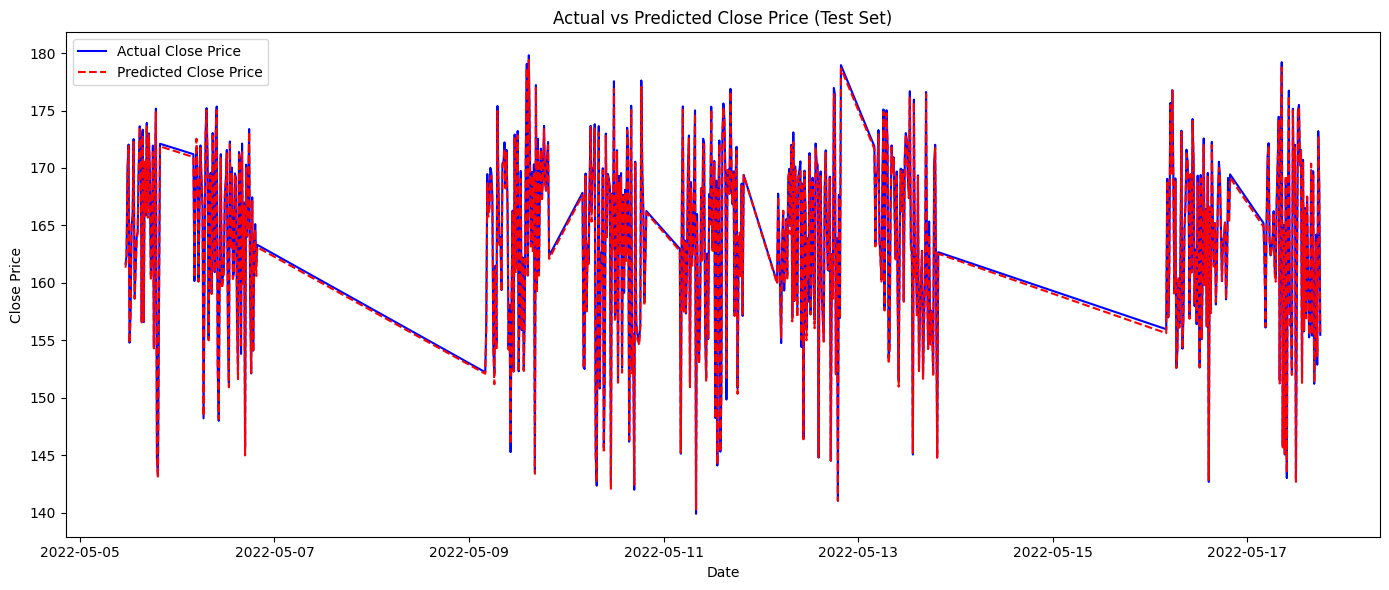

In [ ]:
# Step 5: Final Testing
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)

# Evaluate on Test Set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100  # In percentage

print(f"Test MAE: {mae_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAPE: {mape_test:.2f}%")

# Step 6: Visualization
plt.figure(figsize=(14, 6))
plt.plot(df["DateTime"][-len(y_test):], y_test, label="Actual Close Price", color="blue")
plt.plot(df["DateTime"][-len(y_test):], y_test_pred, label="Predicted Close Price", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()


Second Model

In [ ]:
# Step 1: Load and Prepare Data
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "AAPL_15min_candles_2022_2024.csv"
df = pd.read_csv(file_path)

# Use the least recent 6000 records
df = df.head(6000)
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Define features (X) and target (y)
X = df[["Open", "High", "Low", "Volume"]].values
y = df["Close"].values

# Step 2: Split Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [ ]:
# Initialize Scaler and Incremental Model
scaler = StandardScaler()
model = SGDRegressor(max_iter=1, learning_rate="invscaling", eta0=0.01, warm_start=True)

# Incremental Training with Mini-Batches
batch_size = 100

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i: i + batch_size]
    y_batch = y_train[i: i + batch_size]

    if i == 0:
        X_batch = scaler.fit_transform(X_batch)
    else:
        X_batch = scaler.transform(X_batch)

    model.partial_fit(X_batch, y_batch)

# Validation Evaluation
X_val_scaled = scaler.transform(X_val)
y_val_pred = model.predict(X_val_scaled)

# Validation Metrics
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape_val = mean_absolute_percentage_error(y_val, y_val_pred) * 100

print(f"Validation MAE: {mae_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Validation MAPE: {mape_val:.2f}%")


Validation MAE: 0.2865
Validation RMSE: 0.3875
Validation MAPE: 0.17%


In [ ]:
# Testing Evaluation
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)

# Test Metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Test MAE: {mae_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAPE: {mape_test:.2f}%")


Test MAE: 0.2814
Test RMSE: 0.3718
Test MAPE: 0.17%


In [ ]:
# Step 4: Predict Next Day's Closing Price

# Use the latest available data for prediction
latest_data = df[["Open", "High", "Low", "Volume"]].iloc[-1].values.reshape(1, -1)
latest_data_scaled = scaler.transform(latest_data)

# Predicting the next day's closing price
next_day_close = model.predict(latest_data_scaled)

print(f"📊 Predicted Closing Price for the Next Day: ${next_day_close[0]:.2f}")


📊 Predicted Closing Price for the Next Day: $147.43


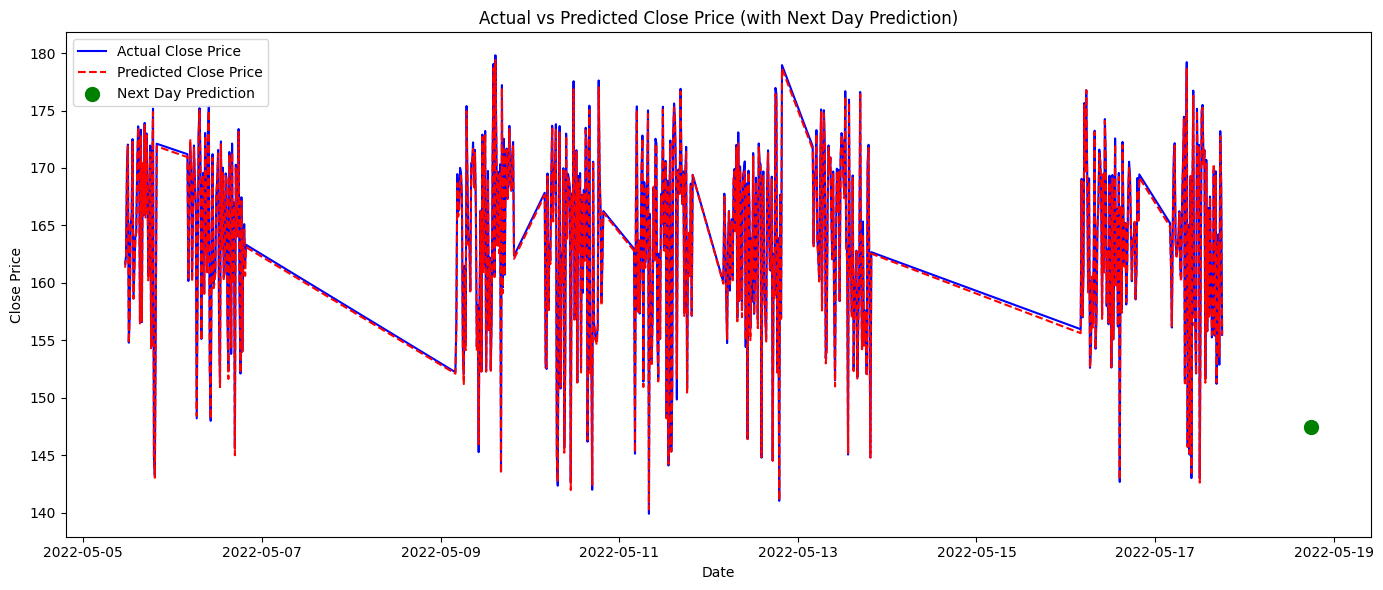

In [ ]:
# Visualization: Actual vs Predicted for Test Data + Next Day Prediction
plt.figure(figsize=(14, 6))
plt.plot(df["DateTime"][-len(y_test):], y_test, label="Actual Close Price", color="blue")
plt.plot(df["DateTime"][-len(y_test):], y_test_pred, label="Predicted Close Price", color="red", linestyle="--")

# Plot Next Day Prediction
plt.scatter(df["DateTime"].iloc[-1] + pd.Timedelta(days=1), next_day_close, color='green', label='Next Day Prediction', marker='o', s=100)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price (with Next Day Prediction)")
plt.legend()
plt.tight_layout()
plt.show()


Third Model

<ipython-input-29-de198ecabda1>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-29-de198ecabda1>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


Validation Metrics:
MAE: 198.1991, RMSE: 224.0686, MAPE: 124.35%

Final Test Metrics:
MAE: 501.5976, RMSE: 513.7993, MAPE: 340.98%

📈 Predicted Close Price for Next Day: -378.08


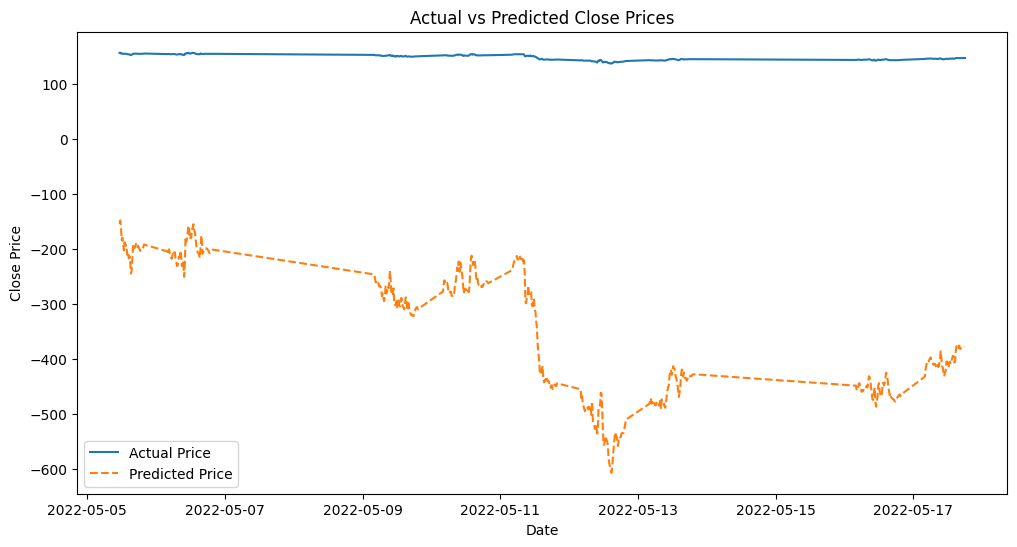

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = '/content/AAPL_15min_candles_2022_2024.csv'
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.sort_values('DateTime').reset_index(drop=True)

# Handle Missing Data
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Use the least recent 6000 records
data = data.iloc[:6000]

# Normalize Features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data[['Open', 'High', 'Low', 'Volume']]), columns=['Open', 'High', 'Low', 'Volume'])
y = data['Close'].values

# Step 3: Train-Test Split (70% Train, 30% Test)
split_idx = int(0.7 * len(data))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Further split Test into Validation (70%) and Final Test (30%)
val_split_idx = int(0.7 * len(X_test))
X_val, X_final_test = X_test[:val_split_idx], X_test[val_split_idx:]
y_val, y_final_test = y_test[:val_split_idx], y_test[val_split_idx:]

# Step 4: Incremental Linear Regression
W = np.zeros(X_train.shape[1])
learning_rate = 0.01  # Reduced learning rate

# Training Loop
for t in range(len(X_train)):
    K_t = X_train.iloc[t].values
    L_t = y_train[t]
    L_hat_t = np.dot(W, K_t)

    # Weight Update Rule
    W = W + learning_rate * (L_t - L_hat_t) * K_t

# Step 5: Validation
y_val_pred = np.dot(X_val, W)

# Metrics for Validation
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape_val = mean_absolute_percentage_error(y_val, y_val_pred) * 100

print(f"Validation Metrics:\nMAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, MAPE: {mape_val:.2f}%")

# Step 6: Final Testing
y_test_pred = np.dot(X_final_test, W)

# Metrics for Testing
mae_test = mean_absolute_error(y_final_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_final_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_final_test, y_test_pred) * 100

print(f"\nFinal Test Metrics:\nMAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%")

# Step 7: Predicting the Next Day
next_day_features = X.iloc[-1].values
next_day_prediction = np.dot(W, next_day_features)

print(f"\n📈 Predicted Close Price for Next Day: {next_day_prediction:.2f}")

# Step 8: Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'].iloc[-len(y_final_test):], y_final_test, label='Actual Price')
plt.plot(data['DateTime'].iloc[-len(y_final_test):], y_test_pred, label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()


Validation Metrics:
MAE: 0.1978, RMSE: 0.3048, MAPE: 0.12%

Final Test Metrics:
MAE: 0.2379, RMSE: 0.3394, MAPE: 0.16%

📈 Predicted Close Price for Next Day: 147.50


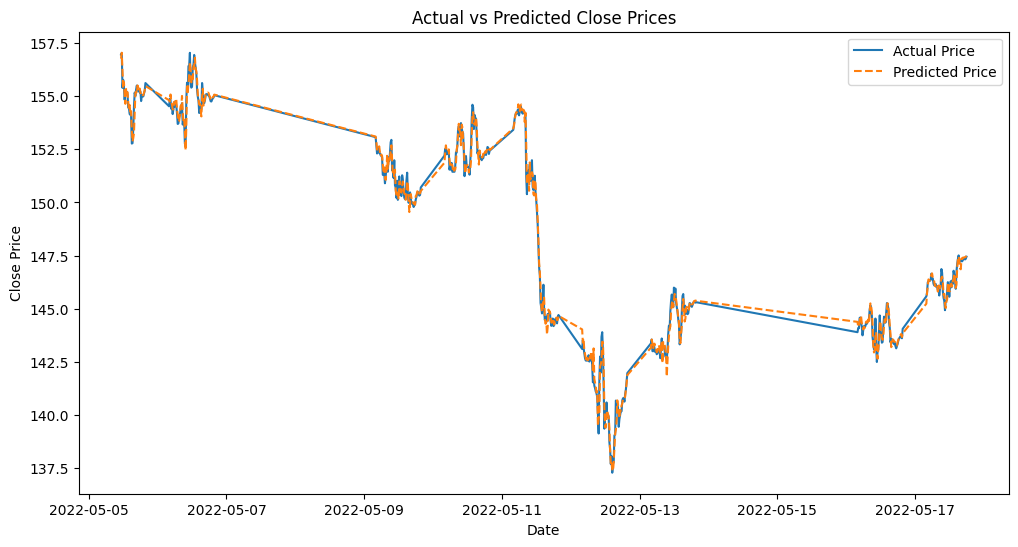

In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = '/content/AAPL_15min_candles_2022_2024.csv'
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# Rename 'DateTime' to 'timestamp' for consistency
data.rename(columns={'DateTime': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace=True)

# Convert timestamp
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp').reset_index(drop=True)

# Use the least recent 6000 records
data = data.iloc[:6000]

# Features and Target
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

# Normalize Features and Target
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 3: Train-Test Split (70% Train, 30% Test)
split_idx = int(0.7 * len(data))
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]

# Further split Test into Validation (70%) and Final Test (30%)
val_split_idx = int(0.7 * len(X_test))
X_val, X_final_test = X_test[:val_split_idx], X_test[val_split_idx:]
y_val, y_final_test = y_test[:val_split_idx], y_test[val_split_idx:]

# Step 4: Incremental Linear Regression
np.random.seed(42)
W = np.random.randn(X_train.shape[1]) * 0.01  # Small random weights
learning_rate = 0.1  # Adjusted for better learning

# Training Loop
for t in range(len(X_train)):
    K_t = X_train[t]
    L_t = y_train[t]
    L_hat_t = np.dot(W, K_t)

    # Weight Update Rule
    W = W + learning_rate * (L_t - L_hat_t) * K_t

# Step 5: Validation
y_val_pred_scaled = np.dot(X_val, W)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()

# Metrics for Validation
mae_val = mean_absolute_error(scaler_y.inverse_transform(y_val.reshape(-1, 1)), y_val_pred)
rmse_val = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_val.reshape(-1, 1)), y_val_pred))
mape_val = mean_absolute_percentage_error(scaler_y.inverse_transform(y_val.reshape(-1, 1)), y_val_pred) * 100

print(f"Validation Metrics:\nMAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, MAPE: {mape_val:.2f}%")

# Step 6: Final Testing
y_test_pred_scaled = np.dot(X_final_test, W)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Metrics for Testing
mae_test = mean_absolute_error(scaler_y.inverse_transform(y_final_test.reshape(-1, 1)), y_test_pred)
rmse_test = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_final_test.reshape(-1, 1)), y_test_pred))
mape_test = mean_absolute_percentage_error(scaler_y.inverse_transform(y_final_test.reshape(-1, 1)), y_test_pred) * 100

print(f"\nFinal Test Metrics:\nMAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%")

# Step 7: Predicting the Next Day
next_day_features = X_scaled[-1]  # Last available data point
next_day_prediction_scaled = np.dot(W, next_day_features)
next_day_prediction = scaler_y.inverse_transform([[next_day_prediction_scaled]])[0][0]

print(f"\n📈 Predicted Close Price for Next Day: {next_day_prediction:.2f}")

# Step 8: Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'].iloc[-len(y_final_test):], scaler_y.inverse_transform(y_final_test.reshape(-1, 1)), label='Actual Price')
plt.plot(data['timestamp'].iloc[-len(y_final_test):], y_test_pred, label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()


Auto Test

✅ Best Learning Rate (alpha): 0.029764 with Validation RMSE: 0.6048

Final Test Metrics:
MAE: 0.2149, RMSE: 0.6100, MAPE: 0.11%

📈 Predicted Close Price for Next Day: 184.75


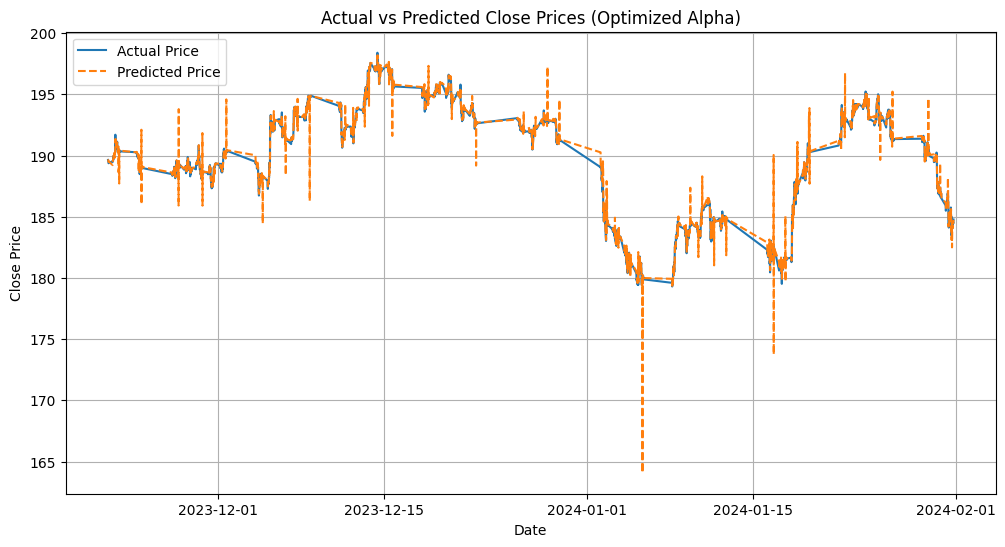

In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = '/content/AAPL_15min_candles_2022_2024.csv'
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
data.rename(columns={'DateTime': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace=True)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp').reset_index(drop=True)
data = data.iloc[:6000]  # Use the least recent 6000 records

# Handle any NaN or infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Features and Target
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

# Normalize Features and Target
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 3: Train-Test Split (70% Train, 30% Test)
split_idx = int(0.7 * len(data))
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]

# Further split Test into Validation (70%) and Final Test (30%)
val_split_idx = int(0.7 * len(X_test))
X_val, X_final_test = X_test[:val_split_idx], X_test[val_split_idx:]
y_val, y_final_test = y_test[:val_split_idx], y_test[val_split_idx:]

# Step 4: Hyperparameter Tuning for Learning Rate (alpha)
learning_rates = np.logspace(-6, -1, 20)  # Reduced upper bound to 0.1 for stability
best_rmse = float('inf')
best_lr = None
best_W = None

# Gradient Clipping Function
def clip_gradients(weights, threshold=1.0):
    norm = np.linalg.norm(weights)
    if norm > threshold:
        return weights * (threshold / norm)
    return weights

for lr in learning_rates:
    np.random.seed(42)
    W = np.random.randn(X_train.shape[1]) * 0.01  # Small random weights

    # Incremental Training Loop
    for t in range(len(X_train)):
        K_t = X_train[t]
        L_t = y_train[t]
        L_hat_t = np.dot(W, K_t)

        # Weight Update with Gradient Clipping
        gradient = (L_t - L_hat_t) * K_t
        gradient = clip_gradients(gradient, threshold=5.0)  # Clipping threshold
        W = W + lr * gradient

        # Early stopping if NaN detected
        if np.isnan(W).any():
            break

    # Skip this learning rate if NaN occurs
    if np.isnan(W).any():
        continue

    # Validation Predictions
    y_val_pred_scaled = np.dot(X_val, W)
    y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()

    # Calculate RMSE for Validation
    rmse_val = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_val.reshape(-1, 1)), y_val_pred))

    # Track Best Model
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_lr = lr
        best_W = W.copy()

# Display Optimal Learning Rate
print(f"✅ Best Learning Rate (alpha): {best_lr:.6f} with Validation RMSE: {best_rmse:.4f}")

# Step 5: Final Testing Using Best Learning Rate
y_test_pred_scaled = np.dot(X_final_test, best_W)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Metrics for Testing
mae_test = mean_absolute_error(scaler_y.inverse_transform(y_final_test.reshape(-1, 1)), y_test_pred)
rmse_test = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_final_test.reshape(-1, 1)), y_test_pred))
mape_test = mean_absolute_percentage_error(scaler_y.inverse_transform(y_final_test.reshape(-1, 1)), y_test_pred) * 100

print(f"\nFinal Test Metrics:\nMAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%")

# Step 6: Predicting the Next Day
next_day_features = X_scaled[-1]  # Last available data point
next_day_prediction_scaled = np.dot(best_W, next_day_features)
next_day_prediction = scaler_y.inverse_transform([[next_day_prediction_scaled]])[0][0]

print(f"\n📈 Predicted Close Price for Next Day: {next_day_prediction:.2f}")

# Step 7: Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'].iloc[-len(y_final_test):], scaler_y.inverse_transform(y_final_test.reshape(-1, 1)), label='Actual Price')
plt.plot(data['timestamp'].iloc[-len(y_final_test):], y_test_pred, label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Optimized Alpha)')
plt.legend()
plt.grid(True)
plt.show()


Multivariate

✅ Best Learning Rate (alpha): 0.054556 with Validation RMSE: 0.5897

Final Test Metrics:
MAE: 0.2079, RMSE: 0.6590, MAPE: 0.11%

📈 Predicted Prices for Next Day:
Close: 184.72, Open: 184.69, High: 184.84, Low: 184.50


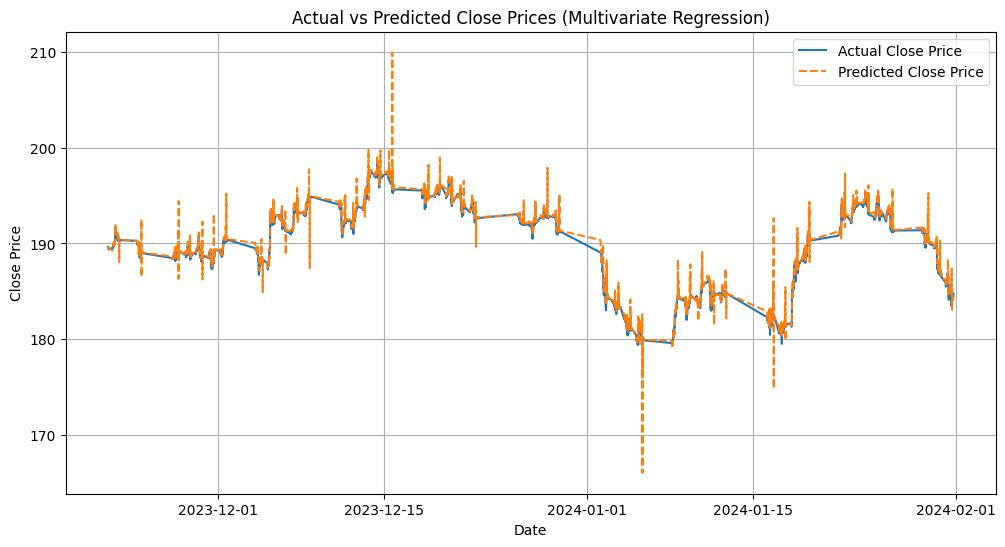

In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = '/content/AAPL_15min_candles_2022_2024.csv'
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
data.rename(columns={'DateTime': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace=True)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp').reset_index(drop=True)
data = data.iloc[:33343]  # Use the least recent 6000 records

# Handle any NaN or infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Features and Multivariate Targets
X = data[['open', 'high', 'low', 'volume']]
Y = data[['close', 'open', 'high', 'low']]  # Multivariate targets

# Normalize Features and Targets
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)

# Step 3: Train-Test Split (70% Train, 30% Test)
split_idx = int(0.7 * len(data))
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
Y_train, Y_test = Y_scaled[:split_idx], Y_scaled[split_idx:]

# Further split Test into Validation (70%) and Final Test (30%)
val_split_idx = int(0.7 * len(X_test))
X_val, X_final_test = X_test[:val_split_idx], X_test[val_split_idx:]
Y_val, Y_final_test = Y_test[:val_split_idx], Y_test[val_split_idx:]

# Step 4: Hyperparameter Tuning for Learning Rate (alpha)
learning_rates = np.logspace(-6, -1, 20)  # Adjusted range for stability
best_rmse = float('inf')
best_lr = None
best_W = None

# Gradient Clipping Function
def clip_gradients(gradients, threshold=5.0):
    norm = np.linalg.norm(gradients)
    if norm > threshold:
        return gradients * (threshold / norm)
    return gradients

for lr in learning_rates:
    np.random.seed(42)
    W = np.random.randn(X_train.shape[1], Y_train.shape[1]) * 0.01  # Weight matrix for multivariate regression

    # Incremental Training Loop
    for t in range(len(X_train)):
        K_t = X_train[t].reshape(-1, 1)               # (4, 1)
        L_t = Y_train[t].reshape(-1, 1)               # (4, 1)
        L_hat_t = np.dot(W.T, K_t)                    # (4, 1)

        # Weight Update with Gradient Clipping
        gradient = np.dot(K_t, (L_t - L_hat_t).T)     # (4, 4)
        gradient = clip_gradients(gradient, threshold=5.0)
        W = W + lr * gradient                         # Update weights

        # Early stopping if NaN detected
        if np.isnan(W).any():
            break

    # Skip this learning rate if NaN occurs
    if np.isnan(W).any():
        continue

    # Validation Predictions
    Y_val_pred_scaled = np.dot(X_val, W)
    Y_val_pred = scaler_Y.inverse_transform(Y_val_pred_scaled)

    # Calculate RMSE for Validation (average across all targets)
    rmse_val = np.sqrt(mean_squared_error(scaler_Y.inverse_transform(Y_val), Y_val_pred))

    # Track Best Model
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_lr = lr
        best_W = W.copy()

# Display Optimal Learning Rate
print(f"✅ Best Learning Rate (alpha): {best_lr:.6f} with Validation RMSE: {best_rmse:.4f}")

# Step 5: Final Testing Using Best Learning Rate
Y_test_pred_scaled = np.dot(X_final_test, best_W)
Y_test_pred = scaler_Y.inverse_transform(Y_test_pred_scaled)

# Metrics for Testing (Averaged)
mae_test = mean_absolute_error(scaler_Y.inverse_transform(Y_final_test), Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(scaler_Y.inverse_transform(Y_final_test), Y_test_pred))
mape_test = mean_absolute_percentage_error(scaler_Y.inverse_transform(Y_final_test), Y_test_pred) * 100

print(f"\nFinal Test Metrics:\nMAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%")

# Step 6: Predicting the Next Day
next_day_features = X_scaled[-1]  # Last available data point
next_day_prediction_scaled = np.dot(next_day_features, best_W)
next_day_prediction = scaler_Y.inverse_transform([next_day_prediction_scaled])[0]

print(f"\n📈 Predicted Prices for Next Day:\nClose: {next_day_prediction[0]:.2f}, Open: {next_day_prediction[1]:.2f}, High: {next_day_prediction[2]:.2f}, Low: {next_day_prediction[3]:.2f}")

# Step 7: Visualization for Close Price
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'].iloc[-len(Y_final_test):], scaler_Y.inverse_transform(Y_final_test)[:, 0], label='Actual Close Price')
plt.plot(data['timestamp'].iloc[-len(Y_final_test):], Y_test_pred[:, 0], label='Predicted Close Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Multivariate Regression)')
plt.legend()
plt.grid(True)
plt.show()


RECENT

Chunk size=2000, LR=1.0e-06, Avg MAPE=13.26%
Chunk size=2000, LR=1.8e-05, Avg MAPE=5.73%
Chunk size=2000, LR=3.2e-04, Avg MAPE=1.53%
Chunk size=2000, LR=5.6e-03, Avg MAPE=0.14%
Chunk size=2000, LR=1.0e-01, Avg MAPE=48121576374.02%
Chunk size=4000, LR=1.0e-06, Avg MAPE=13.88%
Chunk size=4000, LR=1.8e-05, Avg MAPE=7.11%
Chunk size=4000, LR=3.2e-04, Avg MAPE=1.45%
Chunk size=4000, LR=5.6e-03, Avg MAPE=0.13%
Chunk size=4000, LR=1.0e-01, Avg MAPE=1.97%
Chunk size=6000, LR=1.0e-06, Avg MAPE=14.51%
Chunk size=6000, LR=1.8e-05, Avg MAPE=7.80%
Chunk size=6000, LR=3.2e-04, Avg MAPE=1.87%
Chunk size=6000, LR=5.6e-03, Avg MAPE=0.16%
Chunk size=6000, LR=1.0e-01, Avg MAPE=10607.00%
Chunk size=8000, LR=1.0e-06, Avg MAPE=16.96%
Chunk size=8000, LR=1.8e-05, Avg MAPE=9.11%
Chunk size=8000, LR=3.2e-04, Avg MAPE=1.83%
Chunk size=8000, LR=5.6e-03, Avg MAPE=0.16%
Chunk size=8000, LR=1.0e-01, Avg MAPE=7.75%

✅ Best Combination: Chunk size = 4000, Learning Rate = 5.6e-03 with Avg MAPE = 0.13%


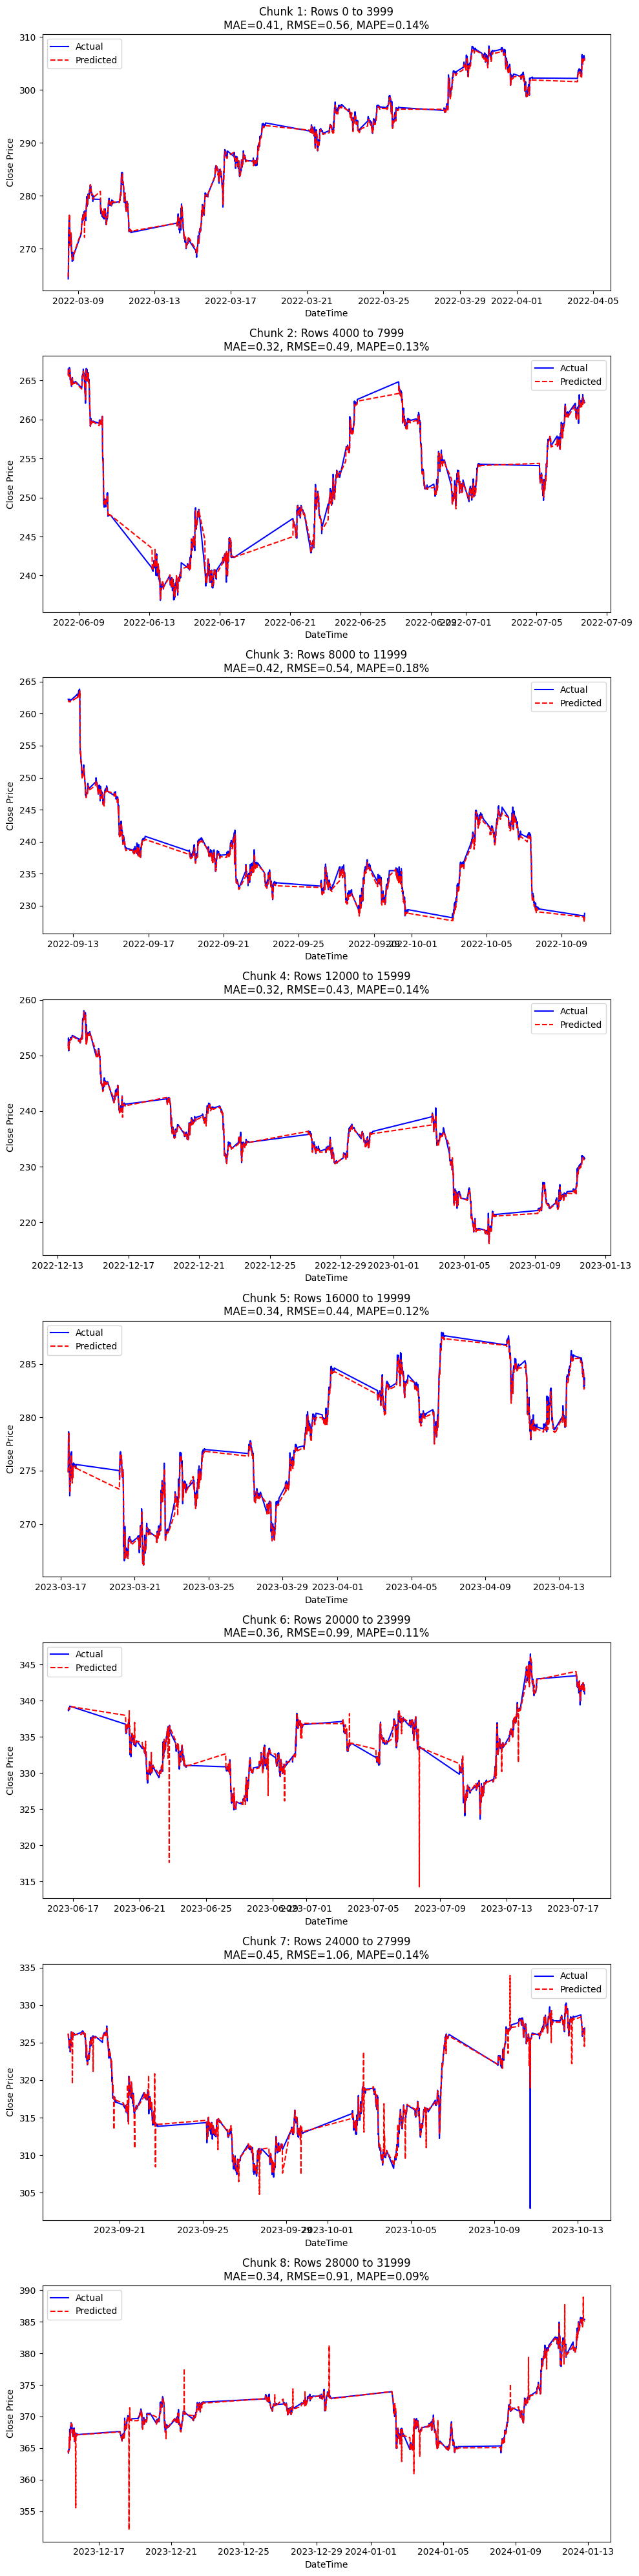

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def drop_nans(df):
    """Drops rows with any NaN values."""
    before = len(df)
    df = df.dropna()
    after = len(df)
    if before != after:
        print(f"Dropped {before - after} rows containing NaN values.")
    return df

def incremental_chunk_training(
    X_scaled,
    y_scaled,
    df,
    chunk_size=6000,
    epochs_per_chunk=2,
    eta0=1e-4,
    alpha=1e-4,
    random_state=42
):
    """
    Performs chunk-based incremental learning using a single SGDRegressor
    across the entire dataset. Returns a list of chunk info (with error metrics)
    and the average MAPE over all chunks.
    """
    model = SGDRegressor(
        max_iter=1,
        learning_rate='constant',
        eta0=eta0,
        penalty='l2',
        alpha=alpha,
        random_state=random_state,
        tol=None
    )

    start_idx = 0
    chunk_data_list = []
    all_mape = []

    while True:
        end_idx = start_idx + chunk_size
        if end_idx > len(X_scaled):
            break

        # Extract current chunk
        chunk_X = X_scaled[start_idx:end_idx]
        chunk_y = y_scaled[start_idx:end_idx]

        # Split current chunk: 70% for training, 30% for testing
        split_idx = int(0.7 * chunk_size)
        X_train = chunk_X[:split_idx]
        y_train = chunk_y[:split_idx]
        X_test  = chunk_X[split_idx:]
        y_test  = chunk_y[split_idx:]

        # Train over multiple epochs for better convergence
        for epoch in range(epochs_per_chunk):
            indices = np.arange(len(X_train))
            np.random.shuffle(indices)
            for i in indices:
                model.partial_fit(X_train[i].reshape(1, -1), [y_train[i]])

        # Predict on the test portion of the chunk
        y_pred_scaled = model.predict(X_test)

        # Inverse transform the test and prediction arrays using scaler_y from global scope
        y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
        y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

        # Compute error metrics
        mae  = mean_absolute_error(y_test_orig, y_pred_orig)
        rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
        mape = mean_absolute_percentage_error(y_test_orig, y_pred_orig) * 100

        all_mape.append(mape)
        chunk_data_list.append((start_idx, end_idx, split_idx, y_test_orig, y_pred_orig, mae, rmse, mape))

        start_idx = end_idx

    avg_mape = np.mean(all_mape) if all_mape else float('inf')
    return chunk_data_list, avg_mape

# ---------------------------
# 1. Load & Preprocess the Data
# ---------------------------
file_path = "AAPL_15min_candles_2022_2024.csv"
df = pd.read_csv("/content/MSFT_15min_candles_2022_2024.csv")
df = drop_nans(df)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('DateTime').reset_index(drop=True)
df['time_index'] = np.arange(len(df))

# Define features and target
X_cols = ['Open', 'High', 'Low', 'Volume', 'time_index']
target_col = 'Close'
X = df[X_cols].values
y = df[target_col].values

# ---------------------------
# 2. Scale Features and Target
# ---------------------------
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# ---------------------------
# 3. Grid Search Over Learning Rates and Chunk Sizes
# ---------------------------
# Candidate learning rates and chunk sizes
candidate_learning_rates = np.logspace(-6, -1, 5)   # e.g., [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
candidate_chunk_sizes    = [2000, 4000, 6000, 8000]

best_lr = None
best_chunk_size = None
best_mape = float('inf')
best_chunks = None

for cs in candidate_chunk_sizes:
    for lr in candidate_learning_rates:
        chunk_data, avg_mape = incremental_chunk_training(
            X_scaled=X_scaled,
            y_scaled=y_scaled,
            df=df,
            chunk_size=cs,
            epochs_per_chunk=2,
            eta0=lr,
            alpha=1e-4,
            random_state=42
        )
        print(f"Chunk size={cs}, LR={lr:.1e}, Avg MAPE={avg_mape:.2f}%")
        if avg_mape < best_mape:
            best_mape = avg_mape
            best_lr = lr
            best_chunk_size = cs
            best_chunks = chunk_data

print(f"\n✅ Best Combination: Chunk size = {best_chunk_size}, Learning Rate = {best_lr:.1e} with Avg MAPE = {best_mape:.2f}%")

# ---------------------------
# 4. Final Plot with the Best Combination
# ---------------------------
num_chunks = len(best_chunks)
fig, axes = plt.subplots(nrows=num_chunks, figsize=(10, 5 * num_chunks))
if num_chunks == 1:
    axes = [axes]

for i, (start_i, end_i, split_i, y_test_orig, y_pred_orig, mae_c, rmse_c, mape_c) in enumerate(best_chunks):
    ax = axes[i]
    # Global indices for the test portion of the chunk
    test_range_global = np.arange(start_i + split_i, end_i)
    ax.plot(df['DateTime'].iloc[test_range_global], y_test_orig, label='Actual', color='blue')
    ax.plot(df['DateTime'].iloc[test_range_global], y_pred_orig, label='Predicted', color='red', linestyle='--')
    ax.set_title(f"Chunk {i+1}: Rows {start_i} to {end_i - 1}\nMAE={mae_c:.2f}, RMSE={rmse_c:.2f}, MAPE={mape_c:.2f}%")
    ax.set_xlabel("DateTime")
    ax.set_ylabel("Close Price")
    ax.legend()

plt.tight_layout()
plt.show()

# Print metrics for each chunk
for i, (_, _, _, _, _, mae_c, rmse_c, mape_c) in enumerate(best_chunks):
    print(f"Chunk {i+1}: MAE={mae_c:.2f}, RMSE={rmse_c:.2f}, MAPE={mape_c:.2f}%")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import files

# --- Load the uploaded CSV file ---
file_path = "AAPL_15min_candles_2022_2024.csv"  # Use the uploaded file path
df = pd.read_csv(file_path)

# --- Display first few rows ---
print("\n📊 Stock Data Preview:")
print(df.head())

# --- Select Features and Target ---
df['DateTime'] = pd.to_datetime(df['DateTime'])  # Ensure timestamp is in datetime format
df['time_index'] = np.arange(len(df))  # Create an index for time series

X = df[['time_index']]  # Feature: Time (converted to index)
y = df['Close']  # Target: Closing Price

# --- Train Linear Regression Model ---
model = LinearRegression()
model.fit(X, y)

# --- Predictions ---
y_pred = model.predict(X)

# --- Plot Results ---
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Actual Prices", alpha=0.5)
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Regression Prediction")
plt.xlabel("Time Index")
plt.ylabel("Closing Price")
plt.title("Standard Linear Regression on Stock Data")
plt.legend()
plt.show()

# --- Print Model Coefficients ---
print("\n📌 Linear Regression Coefficients:")
print(f"Slope (m): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")

